# Dziedziczenie
Omówimy teraz jeden z podstawowych konceptów programowania obiektowego, tj. dziedziczenie.

W założeniu dziedziczenie ma umożliwić rozszerzanie możliwości istniejących klas poprzez tworzenie nowych klas zależnych od już istniejących. Dzięki temu powtarzalne elementy są wykorzystywane wielokrotnie (współdzielenie kodu). W założeniu dziedziczenie ma umożliwić łatwiejsze zarządzanie poprzez wprowadzenie *hierarchii klas*. Hierarchię pobieżnie wyjaśnimy na przykładzie kształtów:  
ogólny kształtu uogólnia prostokąty, a te uogólniają kwadraty, tzn. kształt będzie *bazowy* dla prostokątów i kwadratów, itd.

Klasę po której będziemy dziedziczyć nazwiemy **bazową** klasę dziedziczącą natomiast **pochodną**. W przykładzie powyżej kształty będą bazowe, a kwadraty pochodne.

Dziedziczenie mat umożliwić abstrakcyjne podejście do zadania programistycznego poprzez interpretowania klas dziedziczących jak klas bazowych w zależności od kontekstu, w którym pracujemy (*polimorfizm*). Będzie tak ponieważ, obiekty klas pochodnych będą jednocześnie obiektami klasy bazowej (będą miały wspólnego przodka - bazę), ale nie odwrotnie.

## Przykład bez dziedziczenia
Napiszemy przykładowy program, w którym pojawia sie niezwiązane ze sobą klasy i postaramy się w kolejnych krokach przystosować nasz kod do wykorzystania dziedziczenia.

Zadanie rolnicze. Utworzymy klasy opisujące zwierzęta na farmie. Każde może wydawać dźwięk i się poruszać. Zdefiniujemy potrzebne nam klasy, dodamy metody interakcji z otoczeniem i napiszemy krótki program, na przykład o taki:

In [1]:
#include <iostream>
using namespace std;

In [2]:
class kura{
    public:
    void dzwiek(){cout << "KoKoKo" << endl;}
    void chodz(){/* implementuje poruszanie sie */}
};
class swinia{
    public:
    void dzwiek(){cout << "HrumHrumHrum" << endl;}
    void chodz(){/* implementuje poruszanie sie */}
};
class kon{
    public:
    void dzwiek(){cout << "IchaCha" << endl;}
    void chodz(){/* implementuje poruszanie sie */}
};

Zarządzanie "losem" obiektów nie jest w tym przypadku wygodne. Musimy stworzyć każdy obiekt oddzielnie, przechowywać je w oddzielnych kolekcjach i zastanawiać sie jakie kto metody ma wywołać: 

In [3]:
cout << "Farma wuja Sama" << endl;

kura ktab[5];
swinia stab[2];
kon k;

//wydajemy dzwieki
for(int i=0; i<5; ++i)
    ktab[i].dzwiek();
for(int i=0; i<2; ++i)
    stab[i].dzwiek();
k.dzwiek();

Farma wuja Sama
KoKoKo
KoKoKo
KoKoKo
KoKoKo
KoKoKo
HrumHrumHrum
HrumHrumHrum
IchaCha


(void) @0x7f91dcefdc30


Przedstawimy teraz koncepty związane z dziedziczeniem w języku C++, częśc może sie przekładać na inne języki obiektowe (C#, Java, Python, inne), częśc zupelnie nie.

## Dziedziczenie - Podstawy
### Składnia
Aby zadeklarować dziedziczenie jednej klasy po drugiej napiszemy:

In [ ]:
class nazwa_klasy_pochodnej : [operator widoczności] nazwa_klasy_bazowej{
    //cialo klasy
};

np. B dziedziczy po A

In [ ]:
class A {};
class B : public A {};

Co na diagramie [UML\(Unified Modeling Language\)](https://en.wikipedia.org/wiki/Unified_Modeling_Language) zaznaczylibyśmy przez otwartą strzalką, o tak:

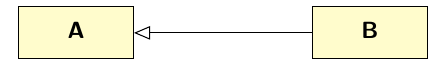

### Nowy operator widoczności - *protected*
Do teraz ograniczaliśmy dostęp do składowych klasy poprzez wykorzystanie operatorów widoczności *public* i *private*. Dla przypomnienia, to co znajdowało się w sekcji *public* było dostępne dla wszystkich, a to co znajdowało się w sekcji *private* było chronione i próby manipulacji kończyły się błędem kompilacji. Z okazji dziedziczenia dochodzi nam trzeci operator, tj. *protected*. W zasadzie działa jak *private* (tj. składowe nim objęte sa niedostępne do manipulacji z zewnątrz) z tą różnicą, że w przypadku dziedziczenia składowe są dostępne dla obiektu dziedziczącego. Popatrzmy na przykład:

In [1]:
#include <iostream>
using namespace std;

In [2]:
class A {
public :
  int a ;

protected :
  int b ;

private :
  int c ;
};

class B : public A {
public :
  void fun () { a = 8; b = 4; c = 5;}
};

input_line_4:15:31: error: 'c' is a private member of 'A'
  void fun () { a = 8; b = 4; c = 5;}
                              ^
input_line_4:9:7: note: declared private here
  int c ;
      ^


ename: evalue

Próbowaliśmy w klasie *pochodnej* zmienić wartość składowej prywatnej c klasy *bazowej*. Tak będzie lepiej:

In [3]:
class A {
public :
  int a ;
    
protected :
  int b ;
    
private :
  int c ;
};

class B : public A {
public :
  void fun () { a =8; b =4; /*c =5*/;} // c jest private !
};

In [4]:
A a;
B b;
// some more code to write here if I need

Tak więc, operator widoczności *protected* pozwala na zabezpieczenie dostępu do atrybutu (działa jak *private*) przy jednoczesnym udzieleniu dostępu klasom pochodnym.

W składni deklaracji dziedziczenia wystepuje operator widoczności. Powoduje on zmianę widoczności atrybutów w klasie dziedziczącej w nastepujący sposób:  
* public - bez zmian:
    * public -> public
    * protected -> protected
    * private -> private
* protected
    * public -> protected
    * protected -> protected
    * private -> brak dostępu
* private
    * public -> private
    * protected -> private
    * private -> brak dostepu

* brak operatora -> domyslnie jak private

**Najczęściej (zawsze) bedziemy wykorzystywać modyfikator *public*.**

Popatrzmy na przykład. Klasa A jest klasa bazową. Posiada 3 atrybuty, każdy w innej sekcji:

In [1]:
#include <iostream>
using namespace std;

In [2]:
class A {
public :
  int a ;
    
protected :
  int b ;
    
private :
  int c ;
};

Klasy B, C i D dziedziczą po A w rożny sposób:

In [3]:
class B : public A {
public :
  void fun () { a = 8; b = 4;/*c = 5;*/} // c jest private !
};

In [4]:
class C : protected A {
public :
  void fun () { a =8; b =4;/*c =5;*/} // c jest private !
  void fun2() {cout << a << " " << b << endl;}
};

In [5]:
class D : A {//private!
public :
  void fun () { a =8; b =4;/*c =5;*/} // c jest private !
  void fun2() {cout << a << " " << b << endl;}
};

B ma dostęp do wszystkiego w A, poza sekcja private:

In [ ]:
B b;
b.fun();
cout << b.a << endl;

In [7]:
cout << b.b << " " << b.c << endl;

input_line_10:2:12: error: 'b' is a protected member of 'A'
 cout << b.b << " " << b.c << endl;
           ^
input_line_4:6:7: note: declared protected here
  int b ;
      ^
input_line_10:2:26: error: 'c' is a private member of 'A'
 cout << b.b << " " << b.c << endl;
                         ^
input_line_4:9:7: note: declared private here
  int c ;
      ^


ename: evalue

C może użyć wszystkiego w A poza private, ale nie może "wystawić" do użytku nic z A:

In [8]:
C c;
c.fun();
c.fun2()

8 4


(void) @0x7fb62d7f8c30


In [9]:
cout << c.a << endl;

input_line_12:2:10: error: cannot cast 'C' to its protected base class 'A'
 cout << c.a << endl;
         ^
input_line_6:1:11: note: declared protected here
class C : protected A {
          ^~~~~~~~~~~
input_line_12:2:12: error: 'a' is a protected member of 'A'
 cout << c.a << endl;
           ^
input_line_6:1:11: note: constrained by protected inheritance here
class C : protected A {
          ^~~~~~~~~~~
input_line_4:3:7: note: member is declared here
  int a ;
      ^


ename: evalue

D może jeszcze mniej, żeby to pokazać powinniśmy wykonać dziedziczenie po C i D i sprawdzić dostępność atrybutów A z wewnątrz klas dziedziczących. 

In [ ]:
D d;
d.fun();
d.fun2();

Proszę wykonać ćwiczenie, w którym dziedziczą państwo po D.

## Rozmiar obiektu - operator *sizeof*
Konsekwencja dziedziczenia klas jest rozszerzanie funkcjonalności i danych, tj. klasa pochodna rozszerza bazową. W konsekwencji obiekty klas dziedziczących będą potrzebować więcej miejsca w pamięci do ich przechowania. Popatrzmy na przykład, w którym klasa B dziedziczy po A, obie przechowują tablicę 1024 *char* (1B każdy) oraz po jednym *int* (4B):

In [1]:
#include <iostream>
using namespace std;

In [2]:
class A {
public :
  char tabA [1024];
  int a ;
};

class B : public A {
public :
  char tabB [1024];
  int b ;
  double c;
};

In [3]:
A a;
B b;
cout << "Sizes in bytes: A:" << sizeof ( a ) <<" B:"<< sizeof ( b ) << endl;

Sizes in bytes: A:1028 B:2064


(std::basic_ostream<char, std::char_traits<char> >::__ostream_type &) @0x7f02c94a7480


Widzimy, że rozmiary instancji A i B to odpowiednie 1028 i 2064 B. Co jeżeli chcemy przechować te instancje w tablicy. Rozpatrzyć możemy takie możliwości:

In [4]:
A tab_A[2];
B tab_B[2];

Na początek sprawdźmy odległości między elementami tablic. Zapiszemy w postaci *long* (to taki duży *int* zdolny do przechowania odpowiednio dużej wartości, a skoro pamięci w nowoczesnym komputerze jest dużo zwykły *int* nie wystarczy) położenie tab_A i jej elementu \[1\]. Wykorzystamy operator adresu \&

In [5]:
long pos_tabA  = (long)tab_A;
long pos_tabA1 = (long)&tab_A[1];

In [6]:
cout << pos_tabA1 - pos_tabA << endl;

1028


(std::basic_ostream<char, std::char_traits<char> >::__ostream_type &) @0x7f02c94a7480


Czyli możemy przechowywać w tablicy tab_A obiekty o rozmiarze 1028 B. Nie powinno nas to dziwić, taki jest w końcu rozmiar A. A co z tab_B:

In [7]:
long pos_tabB  = (long)tab_B;
long pos_tabB1 = (long)&tab_B[1];

In [8]:
cout << pos_tabB1 - pos_tabB << endl;

2064


(std::basic_ostream<char, std::char_traits<char> >::__ostream_type &) @0x7f02c94a7480


A w tablicy tab_B zmieścimy obiekty o rozmiarze 2058 B. Co nas ponownie nie dziwi.  

Naszym kolejnym krokiem jest próba wykorzystania *polimorfizmu* czyli faktu, że B jest rozszerzeniem A (tzn. jest A i czymś jeszcze):

To zadziała, choć jest niepoprawne ze względu na rozmiar przechowywanych w tab_A elementów. tzn. element tab_A\[1\] "wystaje" poza zarezerwowaną pamięć!

**Uwaga**: należy bezwzględnie unikać takiego zapisu:

In [9]:
tab_A[0] = A();
tab_A[1] = B();

(A &) @0x7f02ca6e4404


Może więc tak:

In [10]:
tab_B[0] = A();
tab_B[1] = B();

input_line_13:2:11: error: no viable overloaded '='
 tab_B[0] = A();
 ~~~~~~~~ ^ ~~~
input_line_4:8:8: note: candidate function (the implicit copy assignment operator) not viable: no known conversion from 'A'
      to 'const B' for 1st argument
 class B : public A {
       ^
input_line_4:8:8: note: candidate function (the implicit move assignment operator) not viable: no known conversion from 'A'
      to 'B' for 1st argument


ename: evalue

Ale to nie zadziała! Dzieje się tak, ponieważ staramy się zrzutować obiekt typu *bazowego* A na typ *pochodny* B, a w końcu to B zawiera w sobie A, natomiast A nie wie jak się rozszerzyć by stać się B (stąd komunikat o braku operatora =).  

Jedynym dopuszczalnym działaniem jest przechowanie tablicy wskaźników do klasy bazowej A i wykorzystanie operatorów *new* i *delete* do stworzenia potrzebnych nam obiektów. Zrobimy to w taki sposób:

In [11]:
A* tab[2];
tab[0] = new A();
tab[1] = new B();

(A *) 0x7f02a4c527d0


Działania na elementach tablicy

In [16]:
cout << sizeof(tab[0]) << endl;
cout << sizeof(*tab[0]) << endl;

8
1028


(std::basic_ostream<char, std::char_traits<char> >::__ostream_type &) @0x7f02c94a7480


In [ ]:
delete tab[0];
delete tab[1];

Możemy więc przechować informację (wskaźnik do) o obiektach różnych klas w jednej kolekcji. Nie wiemy jeszcze co stanie się z wywołaniami atrybutów, ale to pokażemy za chwilę. Najpierw zajmiemy się diamentami.

## Wielodziedziczenie
### Zagadnienie diamentu ...
Język C++ umożliwia dziedziczenie po więcej niż jednej klasie. Może to prowadzić do struktury hierarchii zwanej diamentem. Jest to przypadek w, której klasa pochodna dziedziczy po dwóch klasach bazowych, które znowu dziedziczą po wspólnej klasie bazowej. Nie jest wówczas jasne w jaki sposób klasa znajdująca się najniżej w hierarchii ma się dostać do atrybutów klasy najwyższej. Przykładowy schemat UML takiej struktury wygląda następująco:

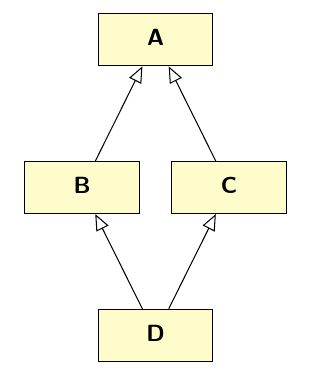

**Uwaga**: W części języków będącymi w jakimś sensie pochodnymi C++ uniemożliwia się w ogóle dziedziczenie wielokrotne by uniknąć tego problemu.

Postaramy się teraz pokazać konsekwencję takiego stanu, a następnie jak język C++ rozwiązuje ten problem. Hierarchia jest jak na ilustracji, po klasie bazowej A dziedziczą klasy B i C. Klasa D dziedziczy zarówno po B i C. Klasy posiadają pewne atrybuty, mamy więc:

In [1]:
#include <iostream>
using namespace std;

In [2]:
class A {
  char buff [1024];
public :
  void show () {cout << "Wywołano medodę A" << endl;}
};

class B : public A {int b;};
class C : public A {int c;};

class D : public B , public C { int d;};

Rozmiary instancji poszczególnych klas wyglądają następująco:

In [3]:
cout << "A: " << sizeof(A) << " B: " << sizeof(B) << " C: " << sizeof(C) << endl;
cout << "ale D: " << sizeof(D) << endl;

A: 1024 B: 1028 C: 1028
ale D: 2060


(std::basic_ostream<char, std::char_traits<char> >::__ostream_type &) @0x7fb9d2df4480


Obiekt typu A zajmuje 1024B, i wiemy dlaczego. obiekty typu B i C dodają po 4B ze względu na swoje atrybuty. Natomiast obiekt typu D zdaje się zawierać 2x1024 + 4 + 4 + 4 = 2060B! Czyli zawiera w sobie dwie instancje klasy A! Być może tego właśnie chcemy (raczej nie), ale jak teraz jednoznacznie dostać się do atrybutów A?

In [4]:
A a; a.show();
B b; b.show();
C c; c.show();

Wywołano medodę A
Wywołano medodę A
Wywołano medodę A


(void) @0x7fb9c97f8c30


To zadziałało, ale:

In [5]:
D d;
d.show();

input_line_8:3:3: error: non-static member 'show' found in multiple base-class subobjects of type 'A':
    class D -> class B -> class A
    class D -> class C -> class A
d.show();
  ^
input_line_4:4:8: note: member found by ambiguous name lookup
  void show () {cout << "Wywołano medodę A" << endl;}
       ^


ename: evalue

Nie możemy więc bezpośrednio dostać sie do atrybutu klasy bazowej A, ponieważ nie jest jasne czy dostajemy się do A przez B, czy przez C. Zadziała natomiast:

In [6]:
b.B::show();
b.C::show();

Wywołano medodę A
Wywołano medodę A


(void) @0x7fb9c97f8c30


Dostęp z operatorem zasięgu i uszczegółowienie w jaki sposób chcemy dotrzeć do potrzebnego nam atrybutu.

### ... i jego rozwiązanie
Aby jednoznacznie rozwiązać problem wielodziedziczenia wprowadzono koncept dziedziczenie wirtualnego. Deklaruje się je przy użyciu słówka kluczowego *virtual*:

In [ ]:
class B : public virtual A {};

Celem jest poinformowanie kompilatora, że dostęp do atrybutów powinien byc jednoznaczny oraz, że klasa bazowa powinna zostać wykorzystana jedynie raz. Zobaczmy to na przykładzie. Hierarchia klas jest jak poprzednio:

In [1]:
#include <iostream>
using namespace std;

In [2]:
class A {
  char buff [1024];
public :
  void show () {cout << "Wywołano medodę A" << endl;}
};

class B : public virtual A {int b;};
class C : public virtual A {int c;};

class D : public B , public C {int d;};

teraz:

In [3]:
cout << "A: " << sizeof(A) << " B: " << sizeof(B) << " C: " << sizeof(C) << endl;
cout << "ale D: " << sizeof(D) << endl;

A: 1024 B: 1040 C: 1040
ale D: 1056


(std::basic_ostream<char, std::char_traits<char> >::__ostream_type &) @0x7ff0c79d9480


Zauważamy, że instancje B i C są większe niż poprzednio o 12B, jest to cena jaką płacimy za wirtualność dziedziczenia. Natomiast rozmiar D to 1056, więc też odrobinę więcej niż proste sumowanie atrybutów A, B i C (1024 + 4 + 4) oraz atrybutów D (4).  

Dostęp do atrybutów A jest teraz jednoznaczny:

In [4]:
A a; a.show();
B b; b.show();
C c; c.show();
D d; d.show();

Wywołano medodę A
Wywołano medodę A
Wywołano medodę A
Wywołano medodę A


(void) @0x7ff0b67fac30


## Dostęp do atrybutów - unifikacja interfejsu
Zaczniemy teraz unifikować dostęp do atrybutów klasy bazowej i dziedziczących. Wróćmy do początkowego przykładu farmerskiego. Zwierzęta na naszej famie rozpatrzymy jako dziedziczące po klasie bazowej *bydle*, damy im też umiejętność jedzenia i wydawanie dźwięku.

In [1]:
#include <iostream>
using namespace std;

In [2]:
class bydle {
public :
  void jedz () {cout << "jedz() not implemented for base class bydle!!" << endl;}
  void dzwiek(){cout << "dzwiek() not implemented for base class bydle!!" << endl;}
};

class kura : public bydle {
public :
  void dzwiek() {cout << " Kokoko" << endl;}
  void jedz() {cout << " Kura dziobie i grzebie" << endl;};
};
class krowa : public bydle {
public :
  void dzwiek() {cout << " Muuu" << endl;}
  void jedz() {cout << " Krowa przezuwa" <<endl;}
};

Wszystkie trzy klasy definiują obiekty i można je stworzyć i użyć. Rezultat poniższego nie powinien być dla nas zdziwieniem:

In [3]:
bydle b;
b.jedz();
b.dzwiek();

kura ku;
ku.jedz();
ku.dzwiek();

krowa kr;
kr.jedz();
kr.dzwiek();

jedz() not implemented for base class bydle!!
dzwiek() not implemented for base class bydle!!
 Kura dziobie i grzebie
 Kokoko
 Krowa przezuwa
 Muuu


(void) @0x7f1df5ff9c30


Klasy *kura* i *krowa* dziedziczą po klasie *bydle* spróbujemy więc przenieść naszą relację na wyższy poziom i nie wdawać się w to jakim konkretnie typem się zajmujemy. Wiemy, że w tablicy przechowywać powinniśmy wskaźniki:

In [4]:
bydle* tab[3];
tab[0] = new bydle();
tab[1] = new kura();
tab[2] = new krowa();

(bydle *) 0x7f1dd865b220


Natomiast taki zabieg pozwoli na wywołanie metod:

In [5]:
for( int i=0; i<3; ++i){
    tab[i]->jedz();
    tab[i]->dzwiek();
}

jedz() not implemented for base class bydle!!
dzwiek() not implemented for base class bydle!!
jedz() not implemented for base class bydle!!
dzwiek() not implemented for base class bydle!!
jedz() not implemented for base class bydle!!
dzwiek() not implemented for base class bydle!!


ale tylko dla klasy bazowej! Nie jest to to co byśmy chcieli zobaczyć. Oczywiście można wykonać rzutowanie na odpowiednie typy, ale było by to niewygodne i w zasadzie bezsensu.

### Metody wirtualne
Co możemy więc zrobić?  
Dostęp do prawidłowej metody realizuję się poprzez dodanie słowa kluczowego *virtual* do deklaracji metody. Zabieg ten pozwala na wywołanie metody klasy pochodnej z poziomu klasy bazowej. Nie jest to zabieg "darmowy", a obarczony pewnym kosztem pamięci i czasu ponieważ jest realizowany nie w czasie kompilacji przez dowiązanie metod, a w czasie wykonania programu i wymaga stworzenia tablicy metod wirtualnych.

In [1]:
#include <iostream>
using namespace std;

In [2]:
class bydle {
public :
  virtual void jedz () {cout << "jedz() not implemented for base class bydle!!" << endl;}
  virtual void dzwiek(){cout << "dzwiek() not implemented for base class bydle!!" << endl;}
};

class kura : public bydle {
public :
  virtual void dzwiek() {cout << " Kokoko" << endl;}
  virtual void jedz() {cout << " Kura dziobie i grzebie" << endl;};
};
class krowa : public bydle {
public :
  virtual void dzwiek() {cout << " Muuu" << endl;}
  virtual void jedz() {cout << " Krowa przezuwa" <<endl;}
};

Teraz:

In [3]:
bydle* tab[3];
tab[0] = new bydle();
tab[1] = new kura();
tab[2] = new krowa();

for( int i=0; i<3; ++i){
    tab[i]->jedz();
    tab[i]->dzwiek();
}

jedz() not implemented for base class bydle!!
dzwiek() not implemented for base class bydle!!
 Kura dziobie i grzebie
 Kokoko
 Krowa przezuwa
 Muuu


Widzimy, że wywołano metody klas pochodnych, czyli to czego chcieliśmy.

## Kolejność wywolania metod konstruktora i destruktora
### Konstruktor
W chwili tworzenia obiektu pochodnego obiekt bazowy (subobiekt) powinien już istnieć. Tak więc konstruktor bazowy zostanie wywołany najpierw. Powinniśmy zwrócić na ten fakt uwagę pisząc własne konstruktory dla klas pochodnych i wywoływać konstruktory klas bazowych w liście inicjalizacyjnej.

In [1]:
#include <iostream>
using namespace std;

In [3]:
class A {
public :
  A () { cout << "Konstruktor A " << endl ;}
  A ( int a ) { cout << "konstruktor parametryczny A " << a << endl;}
};

class B : public A {};

Stwórzmy teraz obiekty A i B:

In [4]:
A a, a1(1);
B b;

Konstruktor A 
konstruktor parametryczny A 1
Konstruktor A 


Oba wywołały konstruktor bazowy A. Co jeżeli jawnie stworzymy konstruktor B. Wówczas powinniśmy wywołać odpowiadający nam konstruktor klasy bazowej w liście inicjalizacyjnej:

In [1]:
#include <iostream>
using namespace std;

class A {
public :
  A() { cout << "Konstruktor A " << endl ;}
  A(int a) { cout << "konstruktor parametryczny A " << a << endl;}
};

class B : public A {
public :
  B() : A() { cout << "Konstruktor B " << endl ;}
  B(int a) : A(a) {cout << "Konstruktor parametryczny B " << a << endl;}
};

Stwórzmy kilka instancji B:

In [2]:
B b, b1(1);

Konstruktor A 
Konstruktor B 
konstruktor parametryczny A 1
Konstruktor parametryczny B 1


### Destruktor
O ile kontrując obiekt jawnie wywołujemy konstruktor klasy pochodnej (wiemy co chcemy utworzyć), o tyle w przypadku wywołania destruktora możliwe, że dysponujemy jedynie odniesieniem do typu bazowego (nie koniecznie wiemy i nie obchodzi nas co niszczymy). Dodatkowo, to klasa pochodna determinowała wykorzystywane przez obiekt zasoby i ich zwolnienia możemy dokonać jedynie z poziomu obiektu pochodnego. Aby to umożliwić, konieczne będzie wykorzystanie mechanizmu funkcji wirtualnych, tj. destruktor uczynimy wirtualnym.

**Uwaga**: dobrą praktyką jest czynić destruktor wirtualnym.

Rozważmy następujący przykład, w którym klasa B dziedziczy po klasie A, obie definiują destruktory:

In [1]:
#include <iostream>
using namespace std;

class A{
    public:
    A() {cout << "Konstruktor A" << endl;}
    ~A(){cout << "Destruktor A" << endl;}
};

class B : public A{
    public:
    B(int n) : A() {
        cout << "Konstruktor B - stworzenie tablicy " << n << " elementów " << endl;
        ptab = new int[n];
    }
    ~B() {
        cout << "Destruktor B - zniszczenie tablicy " << endl;
        delete [] ptab;
    }
    
    private:
    int* ptab;
};

Stwórzmy kilka instancji, dodatkowo ograniczymy zakres obowiązywania by zapewnić wywołanie destruktora:

In [2]:
{
    A a;
    B b(5);
}

Konstruktor A
Konstruktor A
Konstruktor B - stworzenie tablicy 5 elementów 
Destruktor B - zniszczenie tablicy 
Destruktor A
Destruktor A


Jak widzimy w obu przypadkach wywołano destruktor klasy bazowej A, a w przypadku obiektu typu B wywołany został najpierw destruktor B a następnie A. Zdaje się, że wszystko jest w porządku, ale jest tak tylko dlatego, że w sposób jawny operowaliśmy typem B. Co stanie się, jeżeli dysponujemy jedynie wskaźnikiem na typ bazowy:

In [3]:
A* tab[2];
tab[0] = new B(2);
tab[1] = new B(5);

Konstruktor A
Konstruktor B - stworzenie tablicy 2 elementów 
Konstruktor A
Konstruktor B - stworzenie tablicy 5 elementów 


(A *) 0x7f4e2892ab70


In [4]:
delete tab[0];
delete tab[1];

Destruktor A
Destruktor A


(void) nullptr


Wywołany został jedynie destruktor A! Destruktor B nie został wywołany, a to znaczy, że niezwolniona została zaalokowana wcześniej pamięć. Może sie to wydawać mało ważne (pamięci jest dużo!), ale tak nie jest. Np. w przypadku wyspecjalizowanego sprzętu, lub gdy tworzenie i destrukcja obiektów następuje często, a jednocześnie zajmują one dużo zasobów, czy w końcu gdy zniszczony właśnie obiekt był właścicielem istotnego zasobu (dostępu do urządzenia).  

Aby zapewnić wywołanie destruktora klasy pochodnej, uczyńmy go wirtualnym:

In [1]:
#include <iostream>
using namespace std;

class A{
    public:
    A() {cout << "Konstruktor A" << endl;}
    virtual ~A(){cout << "Destruktor A" << endl;}
};

class B : public A{
    public:
    B(int n) : A() {
        cout << "Konstruktor B - stworzenie tablicy " << n << " elementów " << endl;
        ptab = new int[n];
    }
    virtual ~B() {
        cout << "Destruktor B - zniszczenie tablicy " << endl;
        delete [] ptab;
    }
    private:
    int* ptab;
};

In [2]:
A* tab[2];
tab[0] = new B(2);
tab[1] = new B(5);

Konstruktor A
Konstruktor B - stworzenie tablicy 2 elementów 
Konstruktor A
Konstruktor B - stworzenie tablicy 5 elementów 


(A *) 0x7f0b682478d0


In [3]:
delete tab[0];
delete tab[1];

Destruktor B - zniszczenie tablicy 
Destruktor A
Destruktor B - zniszczenie tablicy 
Destruktor A


(void) @0x7f0b85ff9c30


Zauważamy, że destruktory zostały wywołane poprawnie.

## Uniemożliwienie dziedziczenia
Może zajść potrzeba uniemożliwienia dziedziczenia po danej klasie. Klasyczne podejście opierało się o przeniesienie konstruktora do sekcji *private* i stworzeniu statycznej metody tworzącej instancję obiektu. Takie rozwiązanie jest jednak niewygodne, wymaga stworzenia metody dla każdego typu konstruktora, jest nieczytelne i co najważniejsze: o próbie dziedziczenia po takiej klasie kompilator poinformuje nas dopiero gdy spróbujemy stworzyć instancję klasy.

Na szczęście standard C11 wprowadza słowo kluczowe *final*, które rozwiązuje ten problem.

**Przykład przed C11:**

In [1]:
#include <iostream>
using namespace std;

class A {
private:
  A() {}
public:
  static A* zrobA(){return new A();}
};
class B : public A {};

Błąd zobaczymy dopiero przy próbie utworzenia obiektu:

In [2]:
B b;

input_line_4:2:4: error: call to implicitly-deleted default constructor of 'B'
 B b;
   ^
input_line_3:11:11: note: default constructor of 'B' is implicitly deleted because base class 'A' has an inaccessible default
      constructor
class B : public A {};
          ^


ename: evalue

**Przykład po C11**:

In [1]:
class A final {
public :
  A () {};
};
class B : public A {};

input_line_3:6:18: error: base 'A' is marked 'final'
class B : public A {};
                 ^
input_line_3:2:8: note: 'A' declared here
 class A final {
       ^ ~~~~~


ename: evalue

## Metody i klasy abstrakcyjne
Wiemy już o metodach wirtualnych. Metody takie nie muszą definiować ciała w klasie bazowej, bo ciało takie może nie mieć sensu - np.: co miało by oznaczać PoliczPole() w bazowej klasie kształt?

Metodę taka deklarujemy jako pustą poprzez =0 (patrz przykład). Jeżeli klasa posiada metodę abstrakcyjną staje się ona abstrakcyjna i nie ma możliwości utworzenia obiektu takiej klasy. (W innych językach klasa taka nazywa się też interfejsem). konieczne staje się dziedziczenie i implementacja wszystkich metod abstrakcyjnych.  

Rozpatrzmy następujący przykład. Klasa bazowa kształt jest abstrakcyjna i deklaruje dwie metody wirtualne pole() i obwód().

In [1]:
#include <iostream>
using namespace std;

class ksztalt {
public :
  virtual double pole()  = 0;
  virtual double obwod() = 0;
  double p_o() {return pole()/obwod();}
};

Klasa pochodna prostokąt implementuje obie metody:

In [2]:
class prostokat : public ksztalt {
public:
  prostokat(double a, double b) : a(a), b(b) {}
    
  virtual double pole(){return  a*b;}
  virtual double obwod(){return 2*a+2*b;}
private:
  double a;
  double b;
};

Spróbujmy teraz utworzyć instancję klas kształt i prostokąt:

In [3]:
ksztalt k;

input_line_5:2:10: error: variable type 'ksztalt' is an abstract class
 ksztalt k;
         ^
input_line_3:7:18: note: unimplemented pure virtual method 'pole' in 'ksztalt'
  virtual double pole()  = 0;
                 ^
input_line_3:8:18: note: unimplemented pure virtual method 'obwod' in 'ksztalt'
  virtual double obwod() = 0;
                 ^


ename: evalue

Nie możemy tego zrobić, ponieważ kształt jest klasą abstrakcyjną, natomiast:

In [4]:
prostokat p(4,5);
cout << p.pole() << " " << p.obwod() << " " << p.p_o() << endl;

20 18 1.11111


(std::basic_ostream<char, std::char_traits<char> >::__ostream_type &) @0x7fe5108db480


## Lepsza farma
Możemy teraz spróbować zaprogramować farmę, wykorzystującą klasy i polimorfizm. Klasą bazową będzie klasa bydle i wykorzystywać będziemy wskaźnik *polimorficzny* bydle*. Hierarchia naszych klas będzie następująca:

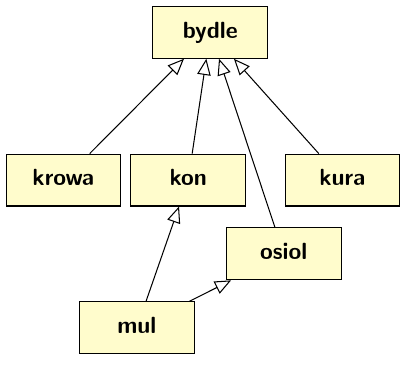

In [1]:
#include <iostream>
#include <vector>
using namespace std;

class bydle {
public :
  virtual ~bydle() {}
  void jedz () {cout << " Amci amci" << endl;}
  virtual void dzwiek() = 0;
};

class kura : public bydle {
public :
  virtual void dzwiek() {cout << " Kokoko" << endl;}
};
class krowa : public bydle {
public :
  virtual void dzwiek() {cout << " Muuu" << endl;}
};
class osiol: public virtual bydle {
public :
  virtual void dzwiek() {cout << " Iooo" << endl;}
};
class kon : public virtual bydle {
public :
  virtual void dzwiek() {cout << " Ihaha" << endl;}
};
class mul: public kon, public osiol {
public :
  virtual void dzwiek() {cout << " ???? " << endl;}
  // jaki dzwiek wydaje Mul?
};

In [2]:
vector<bydle*> zagroda(10);

zagroda[0]=new kura();
zagroda[1]=new kura();
zagroda[2]=new kura();
zagroda[3]=new kura();

zagroda[4]=new osiol();
zagroda[5]=new osiol();
zagroda[6]=new krowa();

zagroda[7]=new kon();
zagroda[8]=new mul();
zagroda[9]=new mul();

for(int i=0; i<zagroda.size(); ++i)
    zagroda[i]->jedz();
for(int i=0; i<zagroda.size(); ++i)
    zagroda[i]->dzwiek();


// koniec zagrody!
for(int i=0; i<zagroda.size(); ++i)
    delete zagroda[i];

 Amci amci
 Amci amci
 Amci amci
 Amci amci
 Amci amci
 Amci amci
 Amci amci
 Amci amci
 Amci amci
 Amci amci
 Kokoko
 Kokoko
 Kokoko
 Kokoko
 Iooo
 Iooo
 Muuu
 Ihaha
 ???? 
 ???? 
